## Import Libraries

In [26]:
import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GRU, BatchNormalization, Reshape
from tensorflow.python.keras import utils
from keras.utils import to_categorical
from numpy import load

### Load Spectrogram and Label Numpy Array from npy file

In [27]:
# load Spectrogam array
X = load('Data/mel_specs.npy')

In [28]:
# load Labels array
y = load('Data/labels.npy')

#### Train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [6]:
X_test.shape

(200, 128, 660)

In [7]:
X_train.shape

(799, 128, 660)

#### Reshaping images to be 128 x 660 x 1, where the 1 represents the single color channel

In [8]:
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)

#### One hot encoding our labels

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Define the Convolutional Recurrent Neural Network Model

In [10]:
model = Sequential(name='CRNN')
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(128, 660, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Dropout(0.1))
resize_shape = model.output_shape[2] * model.output_shape[3]
model.add(Reshape((model.output_shape[1], resize_shape)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(64, return_sequences=False))
model.add(Dense(10, activation='softmax')) 

### Compile the Model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Summary

In [12]:
model.summary()

Model: "CRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 658, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 658, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 329, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 329, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 327, 128)      73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 327, 128)      512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 81, 128)       0      

### Train the model

In [13]:
history = model.fit(X_train, y_train, batch_size=20, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
40/40 [==============================] - 8s 191ms/step - loss: 1.9000 - accuracy: 0.3104 - val_loss: 2.5152 - val_accuracy: 0.1800
Epoch 2/25
40/40 [==============================] - 7s 163ms/step - loss: 1.5038 - accuracy: 0.4681 - val_loss: 2.8418 - val_accuracy: 0.1300
Epoch 3/25
40/40 [==============================] - 7s 164ms/step - loss: 1.3193 - accuracy: 0.5269 - val_loss: 2.3508 - val_accuracy: 0.1900
Epoch 4/25
40/40 [==============================] - 7s 165ms/step - loss: 1.2388 - accuracy: 0.5620 - val_loss: 2.0591 - val_accuracy: 0.2900
Epoch 5/25
40/40 [==============================] - 7s 165ms/step - loss: 1.1212 - accuracy: 0.5982 - val_loss: 2.0360 - val_accuracy: 0.3300
Epoch 6/25
40/40 [==============================] - 7s 165ms/step - loss: 0.9683 - accuracy: 0.6583 - val_loss: 1.5587 - val_accuracy: 0.4700
Epoch 7/25
40/40 [==============================] - 7s 164ms/step - loss: 0.8871 - accuracy: 0.6796 - val_loss: 2.1366 - val_accuracy: 0.3350
Epoch 

### Check the Model's train loss and test loss over epochs.

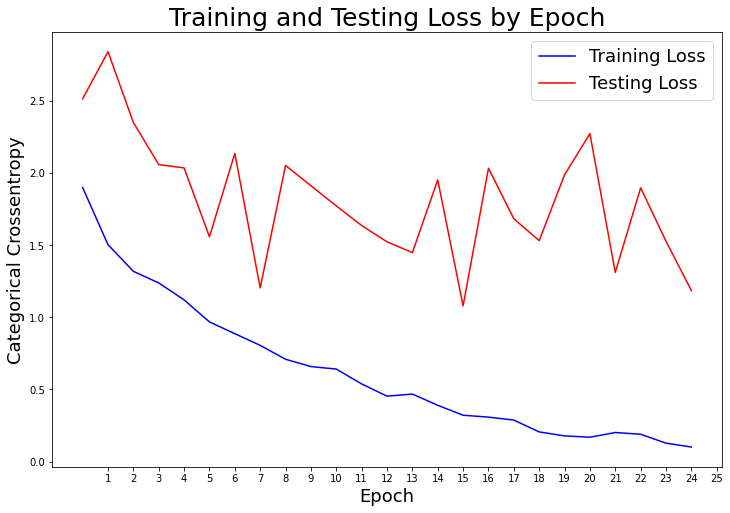

In [14]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### Check the Model's train accuracy and test accuracy over epochs.

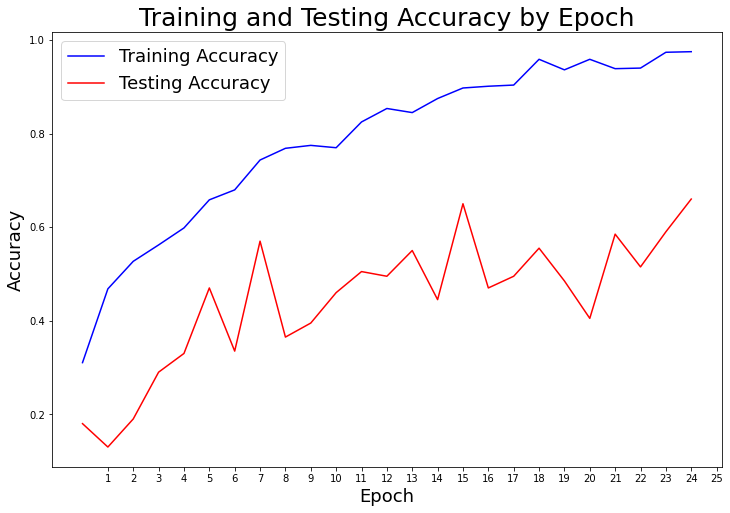

In [15]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(test_loss, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### Evaluate the model

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

7/7 - 1s - loss: 1.1860 - accuracy: 0.6600


In [17]:
print(test_acc)

0.6600000262260437


### Making predictions with the CRNN model

In [18]:
predictions = model.predict(X_test, verbose=1)

7/7 [==============================] - 0s 61ms/step


### CRNN Confusion Matrix

In [19]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
conf_matrix

array([[15,  0,  0,  1,  1,  1,  0,  0,  1,  1],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  5,  6,  0,  0,  1,  0,  0,  0,  6],
       [ 0,  1,  0,  7,  3,  0,  0,  5,  0,  4],
       [ 0,  0,  0,  1, 18,  0,  0,  1,  0,  0],
       [ 3,  3,  3,  0,  0, 10,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  1,  0, 14,  0,  0,  3],
       [ 0,  0,  1,  1,  1,  0,  0, 15,  1,  1],
       [ 0,  0,  0,  2,  1,  0,  0,  4, 11,  2],
       [ 1,  0,  2,  0,  0,  0,  0,  1,  0, 16]])

In [20]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,15,0,0,1,1,1,0,0,1,1
1,0,20,0,0,0,0,0,0,0,0
2,2,5,6,0,0,1,0,0,0,6
3,0,1,0,7,3,0,0,5,0,4
4,0,0,0,1,18,0,0,1,0,0
5,3,3,3,0,0,10,0,1,0,0
6,1,0,0,1,1,0,14,0,0,3
7,0,0,1,1,1,0,0,15,1,1
8,0,0,0,2,1,0,0,4,11,2
9,1,0,2,0,0,0,0,1,0,16


#### Matching the Encoded Labels 

In [21]:
labels_dict = {
        0: 'blues',
        1: 'classical',
        2: 'country',
        3: 'disco',
        4: 'hiphop',
        5: 'jazz',
        6: 'metal',
        7: 'pop',
        8: 'reggae',
        9: 'rock'
    }

In [22]:
confusion_df = confusion_df.rename(columns=labels_dict, index=labels_dict)

In [23]:
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,15,0,0,1,1,1,0,0,1,1
classical,0,20,0,0,0,0,0,0,0,0
country,2,5,6,0,0,1,0,0,0,6
disco,0,1,0,7,3,0,0,5,0,4
hiphop,0,0,0,1,18,0,0,1,0,0
jazz,3,3,3,0,0,10,0,1,0,0
metal,1,0,0,1,1,0,14,0,0,3
pop,0,0,1,1,1,0,0,15,1,1
reggae,0,0,0,2,1,0,0,4,11,2
rock,1,0,2,0,0,0,0,1,0,16


#### Creating a heatmap for the confusion matrix for display

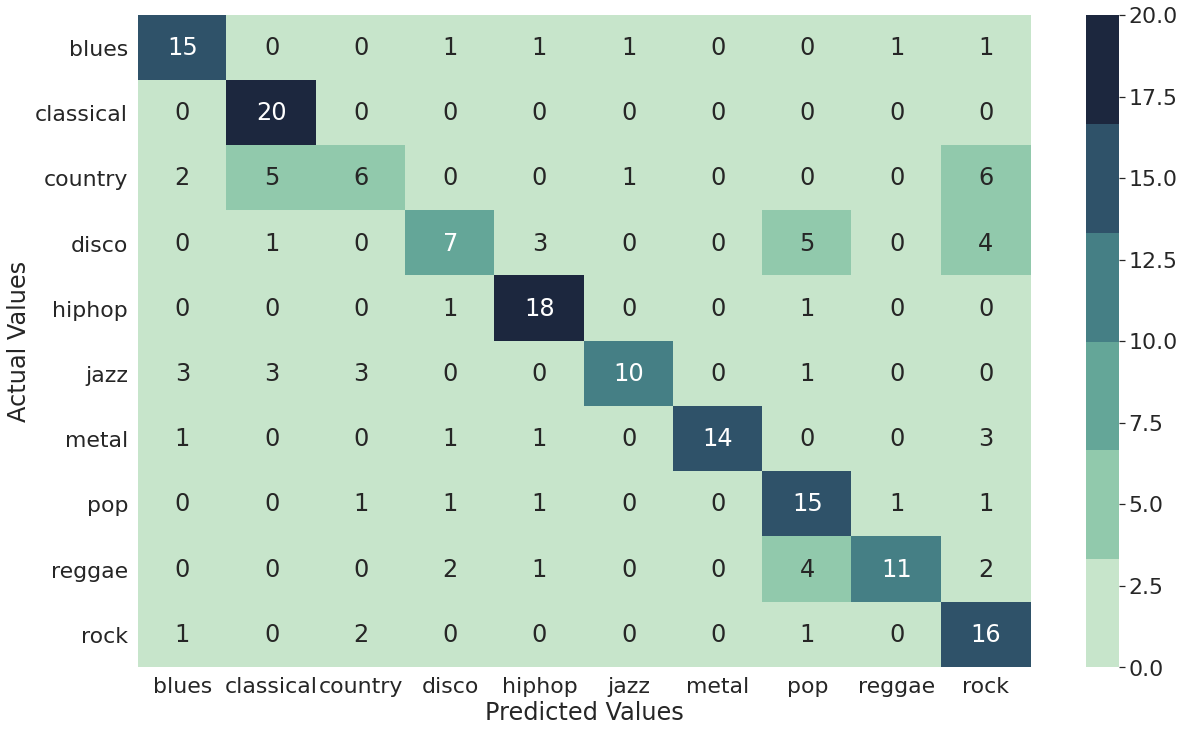

In [24]:
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [25]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, 1),  np.argmax(predictions, 1)))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.69      1.00      0.82        20
           2       0.50      0.30      0.37        20
           3       0.54      0.35      0.42        20
           4       0.72      0.90      0.80        20
           5       0.83      0.50      0.62        20
           6       1.00      0.70      0.82        20
           7       0.56      0.75      0.64        20
           8       0.85      0.55      0.67        20
           9       0.48      0.80      0.60        20

    accuracy                           0.66       200
   macro avg       0.68      0.66      0.65       200
weighted avg       0.68      0.66      0.65       200

